# Projet Data Science

Tomás Mejia, Antoine Balannec, Alexandre Le Borgne, Sébastien Hierso


data datasoft: https://public.opendatasoft.com/explore/dataset/covid-19-pandemic-worldwide-data/export/?disjunctive.zone&disjunctive.category&refine.zone=France

data gouv: https://github.com/opencovid19-fr/data


# Mise en évidence géographique des cas dans les Dom-Tom et la france métropolitaine

Import des librairies nécessaires 


In [2]:
import pandas as pd
import folium

Ouverture des données

In [3]:
map_df = pd.read_csv("datasets/covid-19-pandemic-worldwide-data-fr.csv",";")
df2 = pd.DataFrame(map_df)
df2


,Zone,Sub Zone,Category,Date,Count,Location
0,France,French Guiana,Deaths,2020-04-03,0,"3.9339,-53.1258"
1,France,French Guiana,Deaths,2020-04-16,0,"3.9339,-53.1258"
2,France,French Guiana,Deaths,2020-03-20,0,"3.9339,-53.1258"
3,France,French Guiana,Deaths,2020-04-17,0,"3.9339,-53.1258"
4,France,French Guiana,Deaths,2020-07-21,39,"3.9339,-53.1258"
...,...,...,...,...,...,...
8311,France,Guadeloupe,Deaths,2020-09-24,42,"16.265,-61.551"
8312,France,Guadeloupe,Deaths,2020-02-13,0,"16.265,-61.551"
8313,France,Guadeloupe,Deaths,2020-06-01,14,"16.265,-61.551"
8314,France,Guadeloupe,Deaths,2020-03-10,0,"16.265,-61.551"


Découpage de la colonne Location pour avoir les coordonnées

In [4]:
df2.head()
dataCoord = df2["Location"].str.split(',',expand=True).rename(columns={"0": "a", "1": "b"})


Regroupement des coordonnées des entrées et ajout du nombre de morts

In [5]:
coord = []
for i in range(len(dataCoord)) : 
    finded = True
    for j in range(len(coord)) :
        if dataCoord[0][i] in coord[j][0] :
            if dataCoord[1][i] in coord[j][1] :
                coord[j][2] = coord[j][2] + df2["Count"][i]
                finded = False
    if finded : 
        index = len(coord)
        coord.append(index)
        coord[index] = [dataCoord[0][i],dataCoord[1][i],df2["Count"][i]]
coord

[['3.9339', '-53.1258', 1462210],
 ['-17.6797', '149.4068', 77564],
 ['16.265', '-61.551', 178652],
 ['14.6415', '-61.0242', 87212],
 ['-12.8275', '45.166244', 739520],
 ['-20.904305', '165.618042', 7460],
 ['-21.1151', '55.5364', 292731],
 ['17.9', '-62.8333', 3439],
 ['46.8852', '-56.3159', 877],
 ['18.0708', '-63.0501', 28344],
 ['46.2276', '2.2137', 57860372]]

Affichage du nombre de cas par région, la valeur la plus grosse étant la france métropolitaire

<AxesSubplot:xlabel='0'>

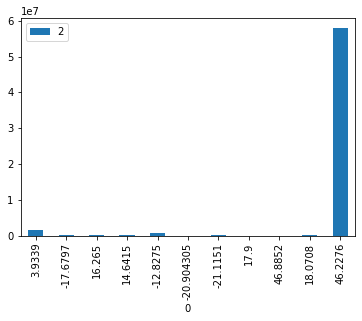

In [6]:
comparaison = pd.DataFrame(coord)
comparaison.plot.bar(0,2)

Génération du carte avec les points et le nombre de morts

In [8]:

map = folium.Map(tiles='OpenStreetMap', zoom_start=5)
map.save(outfile='mappoint.html')
for i in range(len(coord)):
    folium.Marker(location=(coord[i][0], coord[i][1]), popup = "Nombre de cas " + str(coord[i][2])).add_to(map)
map.save(outfile='mappoint.html')

Génération d'une carte avec des cercles qui ont pour rayons le nombre de mort (divisé par 1000000 pour eviter que cela soit trop gros)

In [9]:
map = folium.Map(tiles='OpenStreetMap', zoom_start=5)
map.save(outfile='mapcircle.html')
for i in range(len(coord)):
    folium.CircleMarker(
        location = (coord[i][0], coord[i][1]),
        radius = coord[i][2]/1000000,
        color = 'crimson',
        fill = True,
        fill_color = 'crimson',
        popup = "Nombre de cas " + str(coord[i][2])
    ).add_to(map)
map.save(outfile='mapcircle.html')